# Analysis of different ML algorithms applied to heart failure prediction problem

**Table of Content**
1. Modules configuration
2. Data
    - 2.1. Attribute Information
    - 2.2. Importing data
    - 2.3. Analysing data


***

## 1. Modules configuration

In [16]:
# DataSci basic modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ML algorithms
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# Train-test related modules
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score,\
                balanced_accuracy_score, precision_score, recall_score, f1_score

***

## 2. Data

The data used in this project is part of the [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?select=heart.csv), composed of 5 different datasets from:
- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

The final dataset, after the removal of duplicates, has 918 instances, 11 different features and 2 classes. 



### 2.1. Attribute Information

| Atribute | Description | Value type |
|---|---|---|
|Age | Age of the patient in years | Continuous |
| Sex | Sex of the patient with M: Male, F: Female. | Binary categorical |
| ChestPainType | Chest pain type with TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic. | Categorical  |
| RestingBP | Resting blood pressure measured in mm Hg | Continuous |
| Cholesterol | Serum cholesterol in mm/dl | Continuous |
| FastingBS | Fasting blood sugar with 1: if FastingBS > 120 mg/dl, 0: otherwise | Binary categorical |
| RestingECG | Resting electrocardiogram results with values Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria | Categorical |
| MaxHR | Maximum heart rate achieved with numeric value between 60 and 202 | Continuous |
| ExerciseAngina | Exercise-induced angina with Y: Yes, N: No. | Binary categorical |
| Oldpeak | Oldpeak = ST with numeric value measured in depression. | Continuous |
| ST_Slope | The slope of the peak exercise ST segment with Up: upsloping, Flat: flat, Down: downsloping. | Categorical |
| HeartDisease | Output class with 1: heart disease, 0: Normal. | Binary categorical |

### 2.2. Importing data

In [17]:
PATH = "../data/heart.csv"
raw_data = pd.read_csv(PATH, sep=',')
raw_data.head(8)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0


### 2.3. Analysing data

#### Initial attribute types

In [18]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Description of continuous values

In [19]:
continuous_variables = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
raw_data[continuous_variables].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


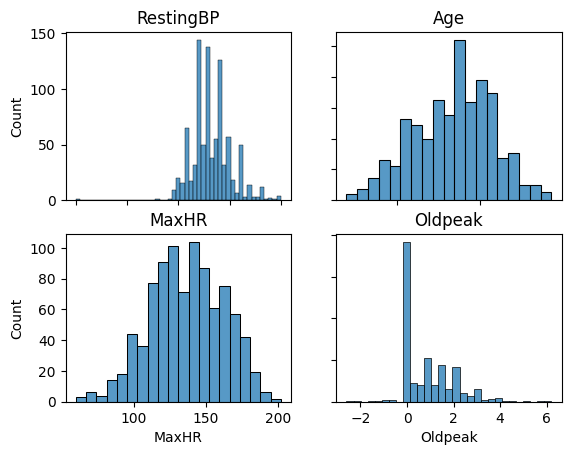

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=2)

output = sns.histplot(raw_data, x="RestingBP", ax=ax[0,0])
ax[0,0].set_title('RestingBP')

output = sns.histplot(raw_data, x="Age", ax=ax[0,1])
ax[0,1].set_title('Age')

output = sns.histplot(raw_data, x="MaxHR", ax=ax[1,0])
ax[1,0].set_title('MaxHR')

output = sns.histplot(raw_data, x="Oldpeak", ax=ax[1,1])
ax[1,1].set_title('Oldpeak')

for a in ax.flat:
    a.label_outer()
    
plt.show()

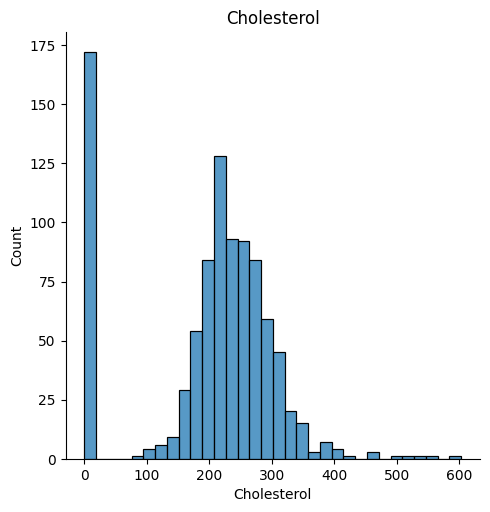

In [43]:
sns.displot(raw_data, x="Cholesterol")
plt.title("Cholesterol")
plt.show()

#### Description of categorical values

In [6]:
raw_data['Sex'].value_counts(normalize=True)

M    0.78976
F    0.21024
Name: Sex, dtype: float64

In [7]:
raw_data['ChestPainType'].value_counts(normalize=True)

ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64

In [8]:
raw_data['FastingBS'].value_counts(normalize=True)

0    0.766885
1    0.233115
Name: FastingBS, dtype: float64

In [9]:
raw_data['RestingECG'].value_counts(normalize=True)

Normal    0.601307
LVH       0.204793
ST        0.193900
Name: RestingECG, dtype: float64

In [10]:
raw_data['ExerciseAngina'].value_counts(normalize=True)

N    0.595861
Y    0.404139
Name: ExerciseAngina, dtype: float64

In [11]:
raw_data['ST_Slope'].value_counts(normalize=True)

Flat    0.501089
Up      0.430283
Down    0.068627
Name: ST_Slope, dtype: float64

In [12]:
raw_data['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64